# Telecom Case Study:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df_active=pd.read_excel('C:telecom/active_customer.xlsx')


In [3]:
df_churn=pd.read_excel('C:telecom/churn_customer.xlsx')

In [4]:
df_active.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          9998 non-null object
ACCOUNT_STATUS               9998 non-null object
FIRST_COMMUNICATION_DATE     9989 non-null datetime64[ns]
UPGRADE_DATE                 9989 non-null datetime64[ns]
SERVICE_ PLAN                8760 non-null object
MODEL                        9323 non-null object
SALES_CHANNEL                7093 non-null object
DIRECT_INDIRECT_CHANNEL      9954 non-null object
SALES_SOURCE                 9306 non-null object
COMPANY_SOURCE_NAME          9988 non-null object
FIRST_NAME                   9998 non-null object
LAST_NAME                    9998 non-null object
ADDRESS                      9945 non-null object
CITY                         9998 non-null object
STATE                        9977 non-null object
ZIPCODE                      9977 non-null object
EMAIL_ADDRESS                9979 non-null object
FEEDBACK                   

In [5]:
df_active.describe()

,GENDER,MARITAL_STATUS,PRESENCE_OF_CHILDREN
count,8728.000000,9680.000000,8684.000000
mean,1.454056,0.572521,0.235030
std,0.497913,0.592780,0.424042
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000


In [6]:
df_active.columns[df_active.isnull().any()]

Index([u'SITE_ACCOUNT_NUMBER', u'ACCOUNT_STATUS', u'FIRST_COMMUNICATION_DATE',
       u'UPGRADE_DATE', u'SERVICE_ PLAN', u'MODEL', u'SALES_CHANNEL',
       u'DIRECT_INDIRECT_CHANNEL', u'SALES_SOURCE', u'COMPANY_SOURCE_NAME',
       u'FIRST_NAME', u'LAST_NAME', u'ADDRESS', u'CITY', u'STATE', u'ZIPCODE',
       u'EMAIL_ADDRESS', u'FEEDBACK', u'SATELLITE', u'SITE_TYPE_DESC',
       u'WARRANTY_NAME', u'MOST_RECENT_SALES_CHANNEL', u'GENDER',
       u'DATE_OF_BIRTH', u'AGE', u'INCOME', u'MARITAL_STATUS',
       u'PRESENCE_OF_CHILDREN', u'COMPUTER_OWNER'],
      dtype='object')

In [7]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
SITE_ACCOUNT_NUMBER          10000 non-null object
ACCOUNT_STATUS               9985 non-null object
FIRST_COMMUNICATION_DATE     10000 non-null datetime64[ns]
CHURN_DATE                   10000 non-null datetime64[ns]
UPGRADE_DATE                 9121 non-null datetime64[ns]
SERVICE_PLAN                 8518 non-null object
MODEL                        9290 non-null object
SALES_CHANNEL                7398 non-null object
DIRECT_INDIRECT_CHANNEL      9216 non-null object
SALES_SOURCE                 9710 non-null object
COMPANY_SOURCE_NAME          9992 non-null object
FIRST_NAME                   9974 non-null object
LAST_NAME                    9993 non-null object
ADDRESS                      9991 non-null object
CITY                         10000 non-null object
STATE                        9955 non-null object
ZIPCODE                      9955 non-null object
EMAIL_ADDRESS 

In [8]:
# Descritptive stats of all numerical variables
df_churn.describe()

,GENDER,AGE,PRESENCE_OF_CHILDREN
count,8762.000000,9992.000000,8748.00000
mean,1.431408,49.556545,0.38043
std,0.495301,14.271563,0.48552
min,1.000000,22.000000,0.00000
25%,1.000000,38.000000,0.00000
50%,1.000000,50.000000,0.00000
75%,2.000000,61.000000,1.00000
max,2.000000,90.000000,1.00000


In [9]:
# Deriving new variable subscription period :how long customers were subscribed 
df_churn['Sub_period']=df_churn['CHURN_DATE']-df_churn['FIRST_COMMUNICATION_DATE']

In [10]:
df_churn['Sub_period'].head()

0   1535 days
1   1649 days
2   2550 days
3    957 days
4   1685 days
Name: Sub_period, dtype: timedelta64[ns]

In [11]:
# converitng Sub_period into int 
df_churn['Sub_period']=df_churn['Sub_period'].apply(lambda x: x.days)

In [12]:
df_churn['Sub_period'].head()

0    1535
1    1649
2    2550
3     957
4    1685
Name: Sub_period, dtype: int64

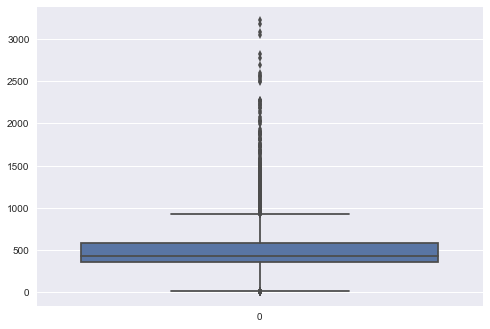

In [13]:
sns.boxplot(data=df_churn['Sub_period'])

In [14]:
# Univariate Analysis : MODEL
df_churn.MODEL.value_counts()

HN9000     2850
HN7000S    1899
DW4000     1618
DW7000     1500
DW6000     1380
UNK          43
Name: MODEL, dtype: int64

In [15]:
df_churn.MODEL.isnull().value_counts()

False    9290
True      710
Name: MODEL, dtype: int64

In [16]:
# SALES CHANNEL
df_churn.SALES_CHANNEL.value_counts()

Call Centers     1675
Retail/Others    1576
Web Orders       1419
Sales Agents     1371
Vars             1357
Name: SALES_CHANNEL, dtype: int64

In [17]:
df_churn.SALES_CHANNEL.isnull().value_counts()

False    7398
True     2602
Name: SALES_CHANNEL, dtype: int64

In [18]:
df_churn.DIRECT_INDIRECT_CHANNEL.isnull().value_counts()

False    9216
True      784
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [19]:
df_churn.DIRECT_INDIRECT_CHANNEL.value_counts()

Indirect    6411
Direct      2805
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [20]:
pd.crosstab(df_churn.SALES_CHANNEL,df_churn.DIRECT_INDIRECT_CHANNEL,margins=True)

DIRECT_INDIRECT_CHANNEL,Direct,Indirect,All
SALES_CHANNEL,,,
Call Centers,476,1185,1661
Retail/Others,446,1126,1572
Sales Agents,384,977,1361
Vars,402,944,1346
Web Orders,393,1018,1411
All,2101,5250,7351


In [21]:
from scipy.stats import chi2_contingency

In [22]:
chi2_contingency(pd.crosstab(df_churn.SALES_CHANNEL,df_churn.DIRECT_INDIRECT_CHANNEL))

(1.584142852133579,
 0.8116392962033514,
 4L,
 array([[  474.73282547,  1186.26717453],
        [  449.29560604,  1122.70439396],
        [  388.9893892 ,   972.0106108 ],
        [  384.70221739,   961.29778261],
        [  403.27996191,  1007.72003809]]))

## Chi2 test shows that Sales_Channel & Direct_indirect_channel has no relationship

In [23]:
chi2_contingency(pd.crosstab(df_churn.SALES_CHANNEL,df_churn.MODEL))

(1846.1224230581781,
 0.0,
 20L,
 array([[ 229.17650531,  198.90791027,  213.60979929,  293.82157615,
          521.91706021,    7.56714876],
        [ 239.81404959,  208.14049587,  223.52479339,  307.45971074,
          546.14256198,    7.91838843],
        [ 189.75501771,  164.69303424,  176.86599764,  243.28025384,
          432.14020071,    6.26549587],
        [ 197.42030697,  171.3459268 ,  184.01062574,  253.10773318,
          449.59681228,    6.51859504],
        [ 203.83412043,  176.91263282,  189.98878394,  261.33072609,
          464.20336482,    6.7303719 ]]))

##  Chi2 test shows that Sales_Channel & Model have relationship: so we can use one variable 

In [24]:
# Company source
df_churn.COMPANY_SOURCE_NAME.value_counts()

HNS Customers    9992
Name: COMPANY_SOURCE_NAME, dtype: int64

In [25]:
# Sales source
df_churn.SALES_SOURCE.value_counts()

TAG                                        1191
Red Ventures LLC (SA)                      1092
DialAmerica Marketing Inc (CC)              647
Communication Solutions LLC (CC)            623
OKS Ameridial Inc (CC)                      586
Hughes Web Order                            568
LiveBridge Communications LLC               523
I-Dish.com LLC (SA)                         405
ALORAD Inc (SA)                             382
ACS                                         376
NationWide Satellite (SA)                   335
ACS Pre-Install                             162
Electronic Express (SA)                     131
RS&I                                        123
EBN Financial dba Dish Systems (SA)         118
Best Buy                                    107
AmericanSat                                 106
Elite Satellite and Home Theater Inc (S     105
Buy Telco                                    95
Perfect 10                                   94
GoDish.com Ltd LLP (SA)                 

In [26]:
# SITE_TYPE_DESC
df_churn.SITE_TYPE_DESC.value_counts()

Spaceway            6113
Broadband Remote    3824
Name: SITE_TYPE_DESC, dtype: int64

In [27]:
# feedback
df_churn.FEEDBACK.value_counts()

BAD     5053
GOOD    2919
Name: FEEDBACK, dtype: int64

In [28]:
# Marital stats
df_churn.MARITAL_STATUS.isnull().value_counts()

False    9719
True      281
Name: MARITAL_STATUS, dtype: int64

In [29]:
df_churn.MARITAL_STATUS.value_counts()

.    3341
0    3053
1    2841
2     484
Name: MARITAL_STATUS, dtype: int64

In [30]:
df_active.MARITAL_STATUS.value_counts()

0.0    4654
1.0    4510
2.0     516
Name: MARITAL_STATUS, dtype: int64

## Since we have not consistent values in Marital Stats column in both churn & active data set so for simplicity , I will drop this column in model building


In [31]:
# Computer own
df_churn.COMPUTER_OWNER.value_counts()

Y    3932
N    2825
Name: COMPUTER_OWNER, dtype: int64

In [32]:
df_active.COMPUTER_OWNER.value_counts()

N    5819
Y    1125
Name: COMPUTER_OWNER, dtype: int64

In [33]:
# Presence of children
df_churn.PRESENCE_OF_CHILDREN.value_counts()

0.0    5420
1.0    3328
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [34]:
df_active.PRESENCE_OF_CHILDREN.value_counts()

0.0    6643
1.0    2041
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [35]:
df_active.columns

Index([u'SITE_ACCOUNT_NUMBER', u'ACCOUNT_STATUS', u'FIRST_COMMUNICATION_DATE',
       u'UPGRADE_DATE', u'SERVICE_ PLAN', u'MODEL', u'SALES_CHANNEL',
       u'DIRECT_INDIRECT_CHANNEL', u'SALES_SOURCE', u'COMPANY_SOURCE_NAME',
       u'FIRST_NAME', u'LAST_NAME', u'ADDRESS', u'CITY', u'STATE', u'ZIPCODE',
       u'EMAIL_ADDRESS', u'FEEDBACK', u'SATELLITE', u'SITE_TYPE_DESC',
       u'WARRANTY_NAME', u'MOST_RECENT_SALES_CHANNEL', u'GENDER',
       u'DATE_OF_BIRTH', u'AGE', u'INCOME', u'MARITAL_STATUS',
       u'PRESENCE_OF_CHILDREN', u'COMPUTER_OWNER'],
      dtype='object')

In [36]:
df_active['SERVICE_ PLAN'].value_counts()

Proplus      1272
Basic_Ltd    1268
Basic        1263
Elite        1256
Power150     1248
Home         1243
Pro          1210
Name: SERVICE_ PLAN, dtype: int64

In [37]:
df_churn.SERVICE_PLAN.isnull().value_counts()

False    8518
True     1482
Name: SERVICE_PLAN, dtype: int64

In [38]:
df_churn.SERVICE_PLAN.value_counts()

Elite                1795
SO                   1184
Home                 1122
Professional          780
Basic_Ltd             666
Proplus               664
Power15               624
Basic                 623
Pro                   555
Professional Plus     505
Name: SERVICE_PLAN, dtype: int64

In [39]:
df_churn.WARRANTY_NAME.value_counts()

0                                               6116
EXPRESS REPAIR BASIC                            2472
EXPRESS REPAIR HOME WITH TERM                    303
SRVC ASSUR STD NEW CUST                          298
Broadband Remote                                  39
SRVC ASSUR PLUS NEW CUST                          28
EXPRESS REPAIR BUSINESS WITH TERM                 23
Spaceway                                          16
EXPRESS REPAIR HOME                               14
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM      10
Name: WARRANTY_NAME, dtype: int64

In [40]:
df_churn.columns

Index([      u'SITE_ACCOUNT_NUMBER',            u'ACCOUNT_STATUS',
        u'FIRST_COMMUNICATION_DATE',                u'CHURN_DATE',
                    u'UPGRADE_DATE',              u'SERVICE_PLAN',
                           u'MODEL',             u'SALES_CHANNEL',
         u'DIRECT_INDIRECT_CHANNEL',              u'SALES_SOURCE',
             u'COMPANY_SOURCE_NAME',                u'FIRST_NAME',
                       u'LAST_NAME',                   u'ADDRESS',
                            u'CITY',                     u'STATE',
                         u'ZIPCODE',             u'EMAIL_ADDRESS',
                        u'FEEDBACK',                 u'SATELLITE',
                  u'SITE_TYPE_DESC',             u'WARRANTY_NAME',
       u'MOST_RECENT_SALES_CHANNEL',                    u'GENDER',
                   u'DATE_OF_BIRTH',                       u'AGE',
                          u'INCOME',            u'MARITAL_STATUS',
            u'PRESENCE_OF_CHILDREN',            u'COMPUTER_OWN

In [41]:
drp_col=['SITE_ACCOUNT_NUMBER','ACCOUNT_STATUS','FIRST_COMMUNICATION_DATE','CHURN_DATE','UPGRADE_DATE','COMPANY_SOURCE_NAME',
         'SALES_CHANNEL','COMPANY_SOURCE_NAME','FIRST_NAME','LAST_NAME','ADDRESS','CITY','ZIPCODE','EMAIL_ADDRESS',
         'WARRANTY_NAME','MOST_RECENT_SALES_CHANNEL','MARITAL_STATUS']

In [42]:
df_churn_drp=df_churn.drop(drp_col,axis=1)

In [43]:
df_churn_drp.AGE.fillna(df_churn_drp.AGE.mean(),inplace=True)
df_churn_drp.AGE=df_churn_drp.AGE.astype('int')

In [44]:
df_churn_drp.drop('DATE_OF_BIRTH',axis=1,inplace=True)

In [45]:
df_churn_drp.GENDER.value_counts()

1.0    4982
2.0    3780
Name: GENDER, dtype: int64

In [46]:
df_churn_drp.GENDER.fillna(1.0,inplace=True)
df_churn_drp.GENDER=df_churn_drp.GENDER.astype('object')

In [47]:
df_churn_drp['CHURN']=1

df_churn_drp.CHURN=df_churn_drp.CHURN


In [48]:
df_churn_drp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
SERVICE_PLAN               8518 non-null object
MODEL                      9290 non-null object
DIRECT_INDIRECT_CHANNEL    9216 non-null object
SALES_SOURCE               9710 non-null object
STATE                      9955 non-null object
FEEDBACK                   7972 non-null object
SATELLITE                  8987 non-null object
SITE_TYPE_DESC             9937 non-null object
GENDER                     10000 non-null object
AGE                        10000 non-null int32
INCOME                     10000 non-null object
PRESENCE_OF_CHILDREN       8748 non-null float64
COMPUTER_OWNER             6757 non-null object
Sub_period                 10000 non-null int64
CHURN                      10000 non-null int64
dtypes: float64(1), int32(1), int64(2), object(11)
memory usage: 1.1+ MB


# Prepraing Active customer data:

In [49]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          9998 non-null object
ACCOUNT_STATUS               9998 non-null object
FIRST_COMMUNICATION_DATE     9989 non-null datetime64[ns]
UPGRADE_DATE                 9989 non-null datetime64[ns]
SERVICE_ PLAN                8760 non-null object
MODEL                        9323 non-null object
SALES_CHANNEL                7093 non-null object
DIRECT_INDIRECT_CHANNEL      9954 non-null object
SALES_SOURCE                 9306 non-null object
COMPANY_SOURCE_NAME          9988 non-null object
FIRST_NAME                   9998 non-null object
LAST_NAME                    9998 non-null object
ADDRESS                      9945 non-null object
CITY                         9998 non-null object
STATE                        9977 non-null object
ZIPCODE                      9977 non-null object
EMAIL_ADDRESS                9979 non-null object
FEEDBACK                   

### There are rows with no information on First Comm date & Upgrade date so we can;t find out how long ciustomers are with the provider. For simplicity sake, dropping off those rows

In [50]:
index=df_active.loc[df_active.FIRST_COMMUNICATION_DATE.isnull(),:].index

In [51]:
df_active.drop(index,axis=0,inplace=True)


In [52]:
df_active.shape

(9989, 29)

In [53]:
df_active['SERVICE_PLAN']=df_active['SERVICE_ PLAN']
df_active.SERVICE_PLAN.value_counts()
df_active.SERVICE_PLAN.isnull().value_counts()
df_active.drop('SERVICE_ PLAN',axis=1,inplace=True)

In [54]:
df_active['Sub_period']=df_active.UPGRADE_DATE - df_active.FIRST_COMMUNICATION_DATE

In [55]:
df_active.Sub_period=df_active.Sub_period.apply(lambda x: x.days)

In [56]:
drp_col_active=['SITE_ACCOUNT_NUMBER','ACCOUNT_STATUS','FIRST_COMMUNICATION_DATE','UPGRADE_DATE','COMPANY_SOURCE_NAME',
         'SALES_CHANNEL','COMPANY_SOURCE_NAME','FIRST_NAME','LAST_NAME','ADDRESS','CITY','ZIPCODE','EMAIL_ADDRESS',
         'WARRANTY_NAME','MOST_RECENT_SALES_CHANNEL','MARITAL_STATUS']

In [57]:
df_active_drp=df_active.drop(drp_col_active,axis=1)

In [58]:
df_active_drp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9997
Data columns (total 15 columns):
MODEL                      9315 non-null object
DIRECT_INDIRECT_CHANNEL    9945 non-null object
SALES_SOURCE               9297 non-null object
STATE                      9968 non-null object
FEEDBACK                   8077 non-null object
SATELLITE                  9594 non-null object
SITE_TYPE_DESC             9979 non-null object
GENDER                     8719 non-null float64
DATE_OF_BIRTH              9989 non-null object
AGE                        9989 non-null object
INCOME                     9672 non-null object
PRESENCE_OF_CHILDREN       8677 non-null float64
COMPUTER_OWNER             6938 non-null object
SERVICE_PLAN               8753 non-null object
Sub_period                 9989 non-null int64
dtypes: float64(2), int64(1), object(12)
memory usage: 1.2+ MB


In [59]:
df_active_drp.drop('DATE_OF_BIRTH',axis=1,inplace=True)

In [60]:
df_active_drp.AGE.isnull().value_counts()


False    9989
Name: AGE, dtype: int64

In [61]:
md_age=df_active_drp.AGE.mode()[0]

In [62]:
df_active_drp.loc[df_active_drp.AGE=='.','AGE']=md_age

In [63]:
df_active_drp.AGE=df_active_drp.AGE.astype('int')

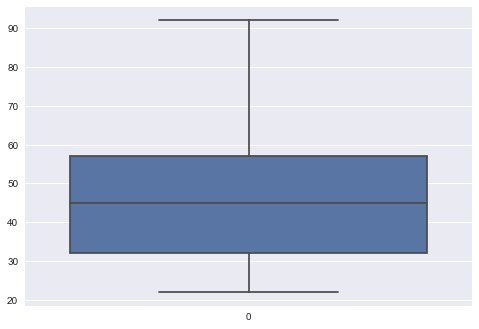

In [64]:
sns.boxplot(data=df_active_drp.AGE)

### Since there are no outliers so we need not do any outlier treatment

In [65]:
df_active_drp.AGE.isnull().any()

False

In [66]:
df_active_drp.PRESENCE_OF_CHILDREN.value_counts()

0.0    6642
1.0    2035
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [67]:
df_active_drp.PRESENCE_OF_CHILDREN.fillna(0.0,inplace=True)

In [68]:
df_active_drp.PRESENCE_OF_CHILDREN=df_active_drp.PRESENCE_OF_CHILDREN.astype('object')

In [69]:
df_active_drp.GENDER.fillna(1.0,inplace=True)
df_active_drp.GENDER=df_active_drp.GENDER.astype('object')

In [70]:
df_active_drp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9997
Data columns (total 14 columns):
MODEL                      9315 non-null object
DIRECT_INDIRECT_CHANNEL    9945 non-null object
SALES_SOURCE               9297 non-null object
STATE                      9968 non-null object
FEEDBACK                   8077 non-null object
SATELLITE                  9594 non-null object
SITE_TYPE_DESC             9979 non-null object
GENDER                     9989 non-null object
AGE                        9989 non-null int32
INCOME                     9672 non-null object
PRESENCE_OF_CHILDREN       9989 non-null object
COMPUTER_OWNER             6938 non-null object
SERVICE_PLAN               8753 non-null object
Sub_period                 9989 non-null int64
dtypes: int32(1), int64(1), object(12)
memory usage: 1.1+ MB


In [71]:
df_active_drp['CHURN']=0

df_active_drp.CHURN=df_active_drp.CHURN
df_active_drp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9997
Data columns (total 15 columns):
MODEL                      9315 non-null object
DIRECT_INDIRECT_CHANNEL    9945 non-null object
SALES_SOURCE               9297 non-null object
STATE                      9968 non-null object
FEEDBACK                   8077 non-null object
SATELLITE                  9594 non-null object
SITE_TYPE_DESC             9979 non-null object
GENDER                     9989 non-null object
AGE                        9989 non-null int32
INCOME                     9672 non-null object
PRESENCE_OF_CHILDREN       9989 non-null object
COMPUTER_OWNER             6938 non-null object
SERVICE_PLAN               8753 non-null object
Sub_period                 9989 non-null int64
CHURN                      9989 non-null int64
dtypes: int32(1), int64(2), object(12)
memory usage: 1.2+ MB


In [72]:
df_churn_drp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
SERVICE_PLAN               8518 non-null object
MODEL                      9290 non-null object
DIRECT_INDIRECT_CHANNEL    9216 non-null object
SALES_SOURCE               9710 non-null object
STATE                      9955 non-null object
FEEDBACK                   7972 non-null object
SATELLITE                  8987 non-null object
SITE_TYPE_DESC             9937 non-null object
GENDER                     10000 non-null object
AGE                        10000 non-null int32
INCOME                     10000 non-null object
PRESENCE_OF_CHILDREN       8748 non-null float64
COMPUTER_OWNER             6757 non-null object
Sub_period                 10000 non-null int64
CHURN                      10000 non-null int64
dtypes: float64(1), int32(1), int64(2), object(11)
memory usage: 1.1+ MB


# Concatinating both datasets


In [357]:
df_final=pd.concat([df_active_drp,df_churn_drp],axis=0)

In [318]:
df_final.shape

(19989, 15)

In [359]:
df_final.columns

Index([                    u'AGE',                   u'CHURN',
                u'COMPUTER_OWNER', u'DIRECT_INDIRECT_CHANNEL',
                      u'FEEDBACK',                  u'GENDER',
                        u'INCOME',                   u'MODEL',
          u'PRESENCE_OF_CHILDREN',            u'SALES_SOURCE',
                     u'SATELLITE',            u'SERVICE_PLAN',
                u'SITE_TYPE_DESC',                   u'STATE',
                    u'Sub_period'],
      dtype='object')

In [360]:
df_final

,AGE,CHURN,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,INCOME,MODEL,PRESENCE_OF_CHILDREN,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_TYPE_DESC,STATE,Sub_period
0,69,0,N,Indirect,NaN,2,0,HN9000,0,UNKNOWN,SPACEWAY3,NaN,Broadband Remote,MD,747
1,43,0,N,Indirect,GOOD,2,4,HN7000S,0,NCC,HZN2-VER-4K,Pro,Spaceway,NJ,1194
2,58,0,N,Indirect,BAD,2,4,HN9000,0,NCC,SM5-VER-15K,Power150,Broadband Remote,LA,1144
3,22,0,NaN,Direct,NaN,1,6,DW6000,1,NaN,SPACEWAY3,Power150,Spaceway,OH,1223
4,36,0,NaN,Indirect,GOOD,1,7,HN7000S,0,TAG,0,Home,Broadband Remote,NY,838
5,51,0,NaN,Indirect,GOOD,2,7,HN9000,0,UNKNOWN,SPACEWAY3,Pro,Broadband Remote,TX,1254
6,56,0,NaN,Indirect,NaN,1,3,HN7000S,0,ValueElectronics,G17-HOR-2K,Power150,Broadband Remote,MO,561
7,57,0,Y,Indirect,GOOD,1,7,HN7000S,0,TAG,SM5-VER-5K,Power150,Broadband Remote,MD,919
8,42,0,NaN,Indirect,GOOD,2,4,DW6000,0,NaN,AM6-HOR-21K,Home,Broadband Remote,AR,1412
9,34,0,N,Indirect,BAD,2,4,HN7000S,1,Hughes Web Order,G17-HOR-6K,Basic_Ltd,Broadband Remote,MD,881


In [361]:
null_col=df_final.columns[df_final.isnull().any()]
null_col

Index([         u'COMPUTER_OWNER', u'DIRECT_INDIRECT_CHANNEL',
                      u'FEEDBACK',                  u'INCOME',
                         u'MODEL',    u'PRESENCE_OF_CHILDREN',
                  u'SALES_SOURCE',               u'SATELLITE',
                  u'SERVICE_PLAN',          u'SITE_TYPE_DESC',
                         u'STATE'],
      dtype='object')

In [362]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19989 entries, 0 to 9999
Data columns (total 15 columns):
AGE                        19989 non-null int32
CHURN                      19989 non-null int64
COMPUTER_OWNER             13695 non-null object
DIRECT_INDIRECT_CHANNEL    19161 non-null object
FEEDBACK                   16049 non-null object
GENDER                     19989 non-null object
INCOME                     19672 non-null object
MODEL                      18605 non-null object
PRESENCE_OF_CHILDREN       18737 non-null object
SALES_SOURCE               19007 non-null object
SATELLITE                  18581 non-null object
SERVICE_PLAN               17271 non-null object
SITE_TYPE_DESC             19916 non-null object
STATE                      19923 non-null object
Sub_period                 19989 non-null int64
dtypes: int32(1), int64(2), object(12)
memory usage: 2.4+ MB


In [363]:
# Filling null values . since all are categorical columns so we will fill with Mode values
for c in null_col:
    df_final[c].fillna(df_final[c].mode()[0],inplace=True)

In [364]:
df_final.isnull().any()

AGE                        False
CHURN                      False
COMPUTER_OWNER             False
DIRECT_INDIRECT_CHANNEL    False
FEEDBACK                   False
GENDER                     False
INCOME                     False
MODEL                      False
PRESENCE_OF_CHILDREN       False
SALES_SOURCE               False
SATELLITE                  False
SERVICE_PLAN               False
SITE_TYPE_DESC             False
STATE                      False
Sub_period                 False
dtype: bool

In [365]:
chi2_contingency(pd.crosstab(df_final.CHURN,df_final.SITE_TYPE_DESC))

(3092.9675169539923, 0.0, 1L, array([[ 5819.79558757,  4169.20441243],
        [ 5826.20441243,  4173.79558757]]))

In [366]:
chi2_contingency(pd.crosstab(df_final.CHURN,df_final.GENDER))

(7.0040177928797052,
 0.0081326981890451119,
 1L,
 array([[ 6121.62939617,  3867.37060383],
        [ 6128.37060383,  3871.62939617]]))

In [367]:
df_final.describe()

,AGE,CHURN,PRESENCE_OF_CHILDREN,Sub_period
count,19989.000000,19989.000000,19989.000000,19989.000000
mean,46.993296,0.500275,0.268298,773.487468
std,14.237485,0.500012,0.443084,390.297292
min,22.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,433.000000
50%,47.000000,1.000000,0.000000,717.000000
75%,58.000000,1.000000,1.000000,1100.000000
max,92.000000,1.000000,1.000000,3221.000000


In [368]:
df_final.PRESENCE_OF_CHILDREN.dtype

dtype('float64')

In [369]:
df_final.PRESENCE_OF_CHILDREN=df_final.PRESENCE_OF_CHILDREN.astype('int').astype('object')

In [370]:
df_final.PRESENCE_OF_CHILDREN.dtype

dtype('O')

In [371]:
df_final.describe()

,AGE,CHURN,Sub_period
count,19989.000000,19989.000000,19989.000000
mean,46.993296,0.500275,773.487468
std,14.237485,0.500012,390.297292
min,22.000000,0.000000,0.000000
25%,35.000000,0.000000,433.000000
50%,47.000000,1.000000,717.000000
75%,58.000000,1.000000,1100.000000
max,92.000000,1.000000,3221.000000


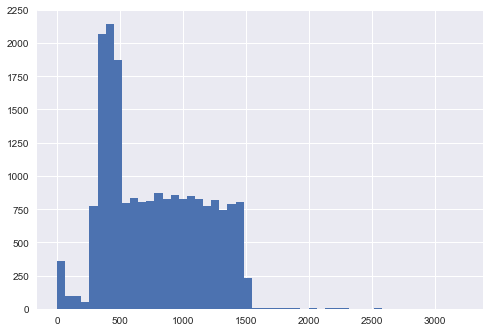

In [372]:
df_final.Sub_period.hist(bins=50)

In [373]:
df_final

,AGE,CHURN,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,INCOME,MODEL,PRESENCE_OF_CHILDREN,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_TYPE_DESC,STATE,Sub_period
0,69,0,N,Indirect,BAD,2,0,HN9000,0,UNKNOWN,SPACEWAY3,Elite,Broadband Remote,MD,747
1,43,0,N,Indirect,GOOD,2,4,HN7000S,0,NCC,HZN2-VER-4K,Pro,Spaceway,NJ,1194
2,58,0,N,Indirect,BAD,2,4,HN9000,0,NCC,SM5-VER-15K,Power150,Broadband Remote,LA,1144
3,22,0,N,Direct,BAD,1,6,DW6000,1,TAG,SPACEWAY3,Power150,Spaceway,OH,1223
4,36,0,N,Indirect,GOOD,1,7,HN7000S,0,TAG,0,Home,Broadband Remote,NY,838
5,51,0,N,Indirect,GOOD,2,7,HN9000,0,UNKNOWN,SPACEWAY3,Pro,Broadband Remote,TX,1254
6,56,0,N,Indirect,BAD,1,3,HN7000S,0,ValueElectronics,G17-HOR-2K,Power150,Broadband Remote,MO,561
7,57,0,Y,Indirect,GOOD,1,7,HN7000S,0,TAG,SM5-VER-5K,Power150,Broadband Remote,MD,919
8,42,0,N,Indirect,GOOD,2,4,DW6000,0,TAG,AM6-HOR-21K,Home,Broadband Remote,AR,1412
9,34,0,N,Indirect,BAD,2,4,HN7000S,1,Hughes Web Order,G17-HOR-6K,Basic_Ltd,Broadband Remote,MD,881


## As shown in histogram of Sub_period, there seems to be outliers.extreme values. So we need some treatment on this so our model is not affected by outliers. I am transforming this feature into categorical through Binning.

In [374]:

bins=pd.cut(df_final.Sub_period,4,labels=['B_'+str(i) for i in range(1,5)],retbins=True)

In [375]:
bins

(0       B_1
 1       B_2
 2       B_2
 3       B_2
 4       B_2
 5       B_2
 6       B_1
 7       B_2
 8       B_2
 9       B_2
 10      B_2
 11      B_2
 12      B_1
 13      B_2
 14      B_1
 15      B_1
 16      B_2
 17      B_2
 18      B_2
 19      B_2
 20      B_2
 21      B_1
 22      B_2
 23      B_2
 24      B_2
 25      B_2
 26      B_2
 27      B_2
 28      B_2
 29      B_2
        ... 
 9970    B_1
 9971    B_2
 9972    B_2
 9973    B_1
 9974    B_1
 9975    B_1
 9976    B_1
 9977    B_2
 9978    B_1
 9979    B_1
 9980    B_1
 9981    B_2
 9982    B_1
 9983    B_2
 9984    B_1
 9985    B_1
 9986    B_1
 9987    B_1
 9988    B_2
 9989    B_2
 9990    B_2
 9991    B_1
 9992    B_1
 9993    B_1
 9994    B_1
 9995    B_1
 9996    B_1
 9997    B_1
 9998    B_2
 9999    B_2
 Name: Sub_period, dtype: category
 Categories (4, object): [B_1 < B_2 < B_3 < B_4],
 array([   -3.221,   805.25 ,  1610.5  ,  2415.75 ,  3221.   ]))

In [376]:
df_final.Sub_period=bins[0]

In [377]:
df_final.Sub_period

0       B_1
1       B_2
2       B_2
3       B_2
4       B_2
5       B_2
6       B_1
7       B_2
8       B_2
9       B_2
10      B_2
11      B_2
12      B_1
13      B_2
14      B_1
15      B_1
16      B_2
17      B_2
18      B_2
19      B_2
20      B_2
21      B_1
22      B_2
23      B_2
24      B_2
25      B_2
26      B_2
27      B_2
28      B_2
29      B_2
       ... 
9970    B_1
9971    B_2
9972    B_2
9973    B_1
9974    B_1
9975    B_1
9976    B_1
9977    B_2
9978    B_1
9979    B_1
9980    B_1
9981    B_2
9982    B_1
9983    B_2
9984    B_1
9985    B_1
9986    B_1
9987    B_1
9988    B_2
9989    B_2
9990    B_2
9991    B_1
9992    B_1
9993    B_1
9994    B_1
9995    B_1
9996    B_1
9997    B_1
9998    B_2
9999    B_2
Name: Sub_period, dtype: category
Categories (4, object): [B_1 < B_2 < B_3 < B_4]


 ## Bin -
 
 <big>
  - B1 (-3.221,805)
  - B2 (805.25- 1610)
  - B3 ( 1611-2415)
  - B4 (2415- 3221)

In [378]:
df_final.Sub_period.value_counts()

B_1    11136
B_2     8787
B_3       52
B_4       14
Name: Sub_period, dtype: int64

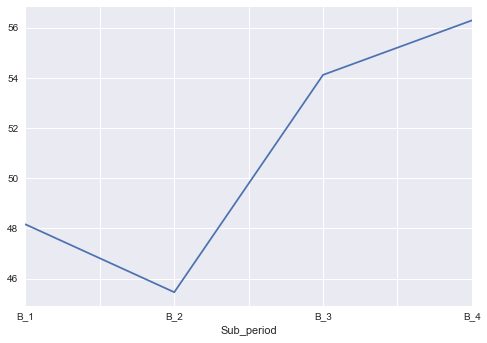

In [379]:
df_final.groupby('Sub_period').apply(lambda x: x.AGE.mean()).plot()

## with age subscription time increases.. (customers becomes loyal or they are satisfied with services)

---

In [380]:
pd.crosstab(df_final.Sub_period,df_final.SITE_TYPE_DESC)

SITE_TYPE_DESC,Broadband Remote,Spaceway
Sub_period,,
B_1,5401,5735
B_2,6183,2604
B_3,50,2
B_4,12,2


In [381]:
pd.crosstab(df_final.Sub_period,df_final.SERVICE_PLAN)

SERVICE_PLAN,Basic,Basic_Ltd,Elite,Home,Power15,Power150,Pro,Professional,Professional Plus,Proplus,SO
Sub_period,,,,,,,,,,,
B_1,929,898,3464,1307,494,379,790,629,404,901,941
B_2,953,1033,2287,1052,129,867,970,137,99,1031,229
B_3,2,3,12,4,1,0,2,11,2,2,13
B_4,1,0,5,2,0,0,1,3,0,1,1


## Most used service plan is `Elite` .
---

In [382]:
pd.crosstab(df_final.Sub_period,df_final.CHURN)

CHURN,0,1
Sub_period,,
B_1,3050,8086
B_2,6939,1848
B_3,0,52
B_4,0,14


##  Customers with subscription period between 805 - 1610 days should be the target customers to provide more benefits so that they can be retained more
---

In [383]:
pd.crosstab(df_final.SITE_TYPE_DESC,df_final.CHURN)

CHURN,0,1
SITE_TYPE_DESC,,
Broadband Remote,7759,3887
Spaceway,2230,6113


### Cudtomers  who are still active are using Broadband . So speed & services should be improved to increase loyality. 

In [384]:
pd.crosstab(df_final.COMPUTER_OWNER ,df_final.CHURN)

CHURN,0,1
COMPUTER_OWNER,,
N,8866,6068
Y,1123,3932


### Customers who are still active are those who do not have computer. They might be using some other gadget like tablet, phone etc. So marketing strategy should be made accordingly.

# Model building

## 1. Linear Model

In [387]:
from sklearn.cluster import AgglomerativeClustering

In [390]:
ag=AgglomerativeClustering(n_clusters=4)

In [391]:
ag.fit(x_seg_sc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x0000000005526048>)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
target=df_final.CHURN.values


In [102]:
df_final.CHURN.value_counts()

1    10000
0     9989
Name: CHURN, dtype: int64

In [103]:
df_final.drop('CHURN',axis=1,inplace=True)

In [104]:
df_final_dummy=pd.get_dummies(df_final,drop_first=True)

In [105]:
df_final_dummy.head()

,AGE,COMPUTER_OWNER_Y,DIRECT_INDIRECT_CHANNEL_Direct,DIRECT_INDIRECT_CHANNEL_Indirect,FEEDBACK_GOOD,GENDER_2.0,INCOME_1,INCOME_2,INCOME_3,INCOME_4,...,STATE_ UT,STATE_ VA,STATE_ VT,STATE_ WA,STATE_ WI,STATE_ WV,STATE_ WY,Sub_period_B_2,Sub_period_B_3,Sub_period_B_4
0,69,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,58,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,22,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,36,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [106]:
#df_final_dummy.drop('index',axis=1,inplace=True)

In [348]:
x_seg_sc=sc.fit_transform(df_final_dummy.values)

C:\Users\lenovo\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [349]:
from sklearn.cluster import KMeans

In [352]:
km=KMeans(n_clusters=4)
km.fit(x_seg_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [108]:
x_tr,x_test,y_tr,y_test=train_test_split(df_final_dummy,target,train_size=.8)

In [109]:
x_tr.shape, x_test.shape,y_tr.shape,y_test.shape

((15991, 279), (3998, 279), (15991L,), (3998L,))

In [110]:
sc=StandardScaler()
x_tr_sc=sc.fit_transform(x_tr)
x_test_sc=sc.fit_transform(x_test)

In [111]:
lr=LogisticRegression(C=.01)

In [118]:
lr.fit(x_tr_sc,y_tr)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
cross_val_score(cv=5,estimator=lr,X=x_tr_sc,y=y_tr,scoring='neg_mean_squared_error')

array([-0.03000938, -0.03094717, -0.03001876, -0.02939337, -0.03503284])

In [121]:
from sklearn.metrics import confusion_matrix,classification_report

In [122]:
confusion_matrix(y_pred=lr.predict(x_tr_sc),y_true=y_tr)

array([[7793,  229],
       [ 225, 7744]])

In [125]:
print "Classification Report - Train Set \n"
print classification_report(y_pred=lr.predict(x_tr_sc),y_true=y_tr)

Classification Report - Train Set 

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      8022
          1       0.97      0.97      0.97      7969

avg / total       0.97      0.97      0.97     15991



In [150]:
print "Classification Report - Test Set \n"
print classification_report(y_pred=lr.predict(x_test_sc),y_true=y_test)

print "\n CONFUSION MATRIX \n"
confusion_matrix(y_pred=lr.predict(x_test_sc),y_true=y_test)

Classification Report - Test Set 

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1967
          1       0.98      0.97      0.97      2031

avg / total       0.97      0.97      0.97      3998


 CONFUSION MATRIX 



array([[1920,   47],
       [  71, 1960]])

In [141]:

pd.DataFrame(lr.coef_,columns=df_final_dummy.columns).T.sort_values(by=0,ascending=False)

,0
SERVICE_PLAN_SO,0.592751
SALES_SOURCE_Red Ventures LLC (SA),0.589194
SATELLITE_SM6-HOR-10K,0.562905
SATELLITE_SPACEWAY3,0.546523
SERVICE_PLAN_Professional,0.521394
SATELLITE_G3C-VER-24K,0.507988
SATELLITE_G28-HOR-16K,0.492790
SERVICE_PLAN_Power15,0.491962
SATELLITE_HZN-HOR-8K,0.474328
SALES_SOURCE_DialAmerica Marketing Inc (CC),0.460722


# Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rf=RandomForestClassifier(n_estimators=100)

In [192]:
rf.fit(x_tr_sc,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [199]:
feature=pd.DataFrame(np.round((rf.feature_importances_),3),index=df_final_dummy.columns)
feature=feature.rename(columns={0:'IMP'})
feature.head()

,IMP
AGE,0.036
COMPUTER_OWNER_Y,0.044
DIRECT_INDIRECT_CHANNEL_Direct,0.004
DIRECT_INDIRECT_CHANNEL_Indirect,0.004
FEEDBACK_GOOD,0.026


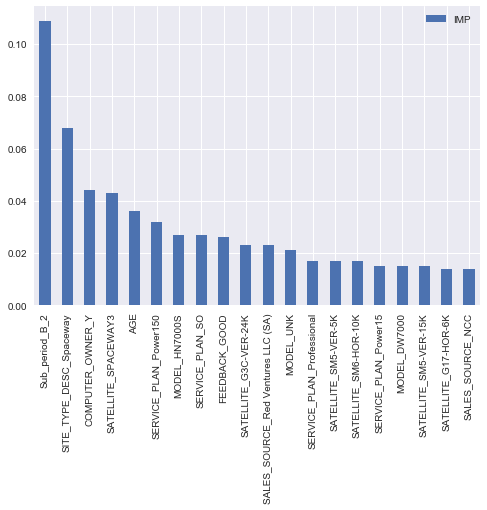

In [194]:
feature.sort_values(ascending=False,by='IMP')[:20].plot(kind='bar')

# 1. Sub_period B2 having subscription period between  is the most important feature.
# 2. Spaceway type subscription is another important feature that define customer behaviour.


In [195]:
print classification_report(y_pred=rf.predict(x_tr_sc),y_true=y_tr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8022
          1       1.00      1.00      1.00      7969

avg / total       1.00      1.00      1.00     15991



In [196]:
print classification_report(y_pred=rf.predict(x_test_sc),y_true=y_test)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1967
          1       0.97      0.97      0.97      2031

avg / total       0.97      0.97      0.97      3998



In [197]:
print ("TEST SET \n")
confusion_matrix(y_pred=rf.predict(x_test_sc),y_true=y_test)

TEST SET 



array([[1903,   64],
       [  54, 1977]])

In [198]:
print ("TRAIN SET \n")
confusion_matrix(y_pred=rf.predict(x_tr_sc),y_true=y_tr)

TRAIN SET 



array([[8022,    0],
       [   0, 7969]])

# KNN 

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

In [226]:
kn=KNeighborsClassifier
grid={'n_neighbors':[10,15,20,25,30]
               }

In [ ]:
kn=KNeighborsClassifier

In [224]:
gr=GridSearchCV(estimator=kn,param_grid=grid,cv=5,scoring='accuracy')

In [227]:
gr.fit(x_tr_sc,y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [228]:
gr.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [230]:
print classification_report(y_pred=gr.best_estimator_.predict(x_tr_sc),y_true=y_tr)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      8022
          1       0.98      0.90      0.94      7969

avg / total       0.94      0.94      0.94     15991



In [231]:
confusion_matrix(y_pred=gr.best_estimator_.predict(x_tr_sc),y_true=y_tr)

array([[7861,  161],
       [ 798, 7171]])

In [232]:
confusion_matrix(y_pred=gr.best_estimator_.predict(x_test_sc),y_true=y_test)

array([[1925,   42],
       [ 249, 1782]])

In [233]:
print classification_report(y_pred=gr.best_estimator_.predict(x_test_sc),y_true=y_test)

             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1967
          1       0.98      0.88      0.92      2031

avg / total       0.93      0.93      0.93      3998



# Best model is Random forest classifier having best accuracy score & recall, precision.
